## 1. General Spline Formulation

Q(t) = `G`\*`B`\*`T(t)` = $\text{Geometry G} . \text{Spline Basis B} . \text{Power Basis T(t)}$

Eg: 

Cubic Bezier P(t) = $\begin{bmatrix} x_1 & x_2 & x_3 & x_4 \\ y_1 & y_2 & y_3 & y_4  \end{bmatrix} \begin{bmatrix} (1-t)^3 \\ 3t(1-t)^2 \\ 3t^2(1-t) \\ t^3 \end{bmatrix} = \begin{bmatrix} x_1 & x_2 & x_3 & x_4 \\ y_1 & y_2 & y_3 & y-4  \end{bmatrix} \begin{bmatrix} 1 & -3 & 3 & -1 \\ 0 & 3 & -6 & 3 \\ 0 & 0 & 3 & -3 \\ 0 & 0 & 0 & 1 \end{bmatrix} \begin{bmatrix} 1 \\ t \\ t^2 \\ t^3  \end{bmatrix}$

Thus any linear transformation `M` on `Q(t)` is equivalent to the linear transformation on the geometry points `G`:

$M * Q(t) = (MG).B.T(t)$

For affine transformations you can add another dimension with constant value `1` to `G`.

## 2. Differential properties of curves

### 2.1 Tangents

$P'(t) = \begin{bmatrix} x_1 & x_2 & x_3 & x_4 \\ y_1 & y_2 & y_3 & y_4  \end{bmatrix} \begin{bmatrix} 1 & -3 & 3 & -1 \\ 0 & 3 & -6 & 3 \\ 0 & 0 & 3 & -3 \\ 0 & 0 & 0 & 1 \end{bmatrix} \begin{bmatrix} 0 \\ 1 \\ 2t \\ 3t^2  \end{bmatrix}$

$\implies P'(t) = \begin{bmatrix} x_1 & x_2 & x_3 & x_4 \\ y_1 & y_2 & y_3 & y_4  \end{bmatrix} \begin{bmatrix} -3+6t-3t^2 \\ 3-12t+9t^2 \\ 6t-9t^2 \\ 3t^2 \end{bmatrix} $

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
B1 = lambda t: (1-t)**3
B2 = lambda t: 3 * t * ((1-t)**2)
B3 = lambda t: 3 * (t**2) * (1-t)
B4 = lambda t: t**3

times = [i/100 for i in range(101)]

x_weights = [0.1, 1.5, 0.8, -2]
xs = [B1(t) * x_weights[0] + B2(t) * x_weights[1] + B3(t) * x_weights[2] + B4(t) * x_weights[3] for t in times]

y_weights = [2.1, 3.5, -3.8, 2]
ys = [B1(t) * y_weights[0] + B2(t) * y_weights[1] + B3(t) * y_weights[2] + B4(t) * y_weights[3] for t in times]

In [3]:
derivative_B1 = lambda t: -3 + 6*t - 3*(t**2)
derivative_B2 = lambda t: 3 - 12*t + 9*(t**2)
derivative_B3 = lambda t: 6*t - 9*(t**2)
derivative_B4 = lambda t: 3*(t**2)

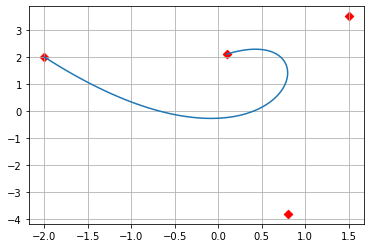

In [4]:
plt.grid()
_ = plt.scatter(x_weights, y_weights, c='red', marker='D')
_ = plt.plot(xs, ys)

In [5]:
sparse_times = [i/100 for i in range(0,101,20)]
sparse_times

[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]

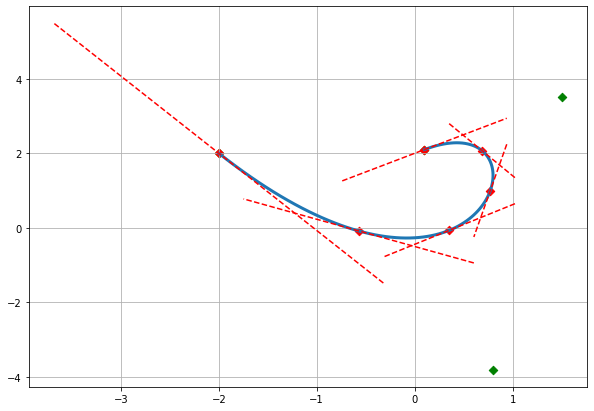

In [6]:
plt.figure(figsize=(10,7))
plt.grid()
_ = plt.scatter(x_weights, y_weights, c='green', marker='D')
_ = plt.plot(xs, ys, lw=3, ls='-')

delta_t = 0.2

for t in sparse_times:
    x_start = B1(t) * x_weights[0] + B2(t) * x_weights[1] + B3(t) * x_weights[2] + B4(t) * x_weights[3]
    y_start = B1(t) * y_weights[0] + B2(t) * y_weights[1] + B3(t) * y_weights[2] + B4(t) * y_weights[3]
    
    delta_x = derivative_B1(t) * x_weights[0] + derivative_B2(t) * x_weights[1] + derivative_B3(t) * x_weights[2] + derivative_B4(t) * x_weights[3]
    delta_x *= delta_t
    delta_y = derivative_B1(t) * y_weights[0] + derivative_B2(t) * y_weights[1] + derivative_B3(t) * y_weights[2] + derivative_B4(t) * y_weights[3]
    delta_y *= delta_t
    
    plt.scatter(x_start, y_start, c='red', marker='D')
    plt.plot([x_start-delta_x, x_start+delta_x], [y_start-delta_y, y_start+delta_y], c='red', ls='--')
    

#### We can normalize the tangent vectors if we only care only about the direction and not about the magnitude

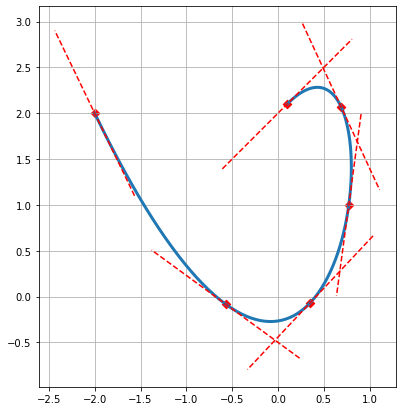

In [7]:
plt.figure(figsize=(10,7))
plt.grid()
plt.gca().set_aspect('equal', adjustable='box')
# _ = plt.scatter(x_weights, y_weights, c='green', marker='D')
_ = plt.plot(xs, ys, lw=3, ls='-')

delta_t = 0.2

for t in sparse_times:
    x_start = B1(t) * x_weights[0] + B2(t) * x_weights[1] + B3(t) * x_weights[2] + B4(t) * x_weights[3]
    y_start = B1(t) * y_weights[0] + B2(t) * y_weights[1] + B3(t) * y_weights[2] + B4(t) * y_weights[3]
    
    delta_x = derivative_B1(t) * x_weights[0] + derivative_B2(t) * x_weights[1] + derivative_B3(t) * x_weights[2] + derivative_B4(t) * x_weights[3]
    delta_x *= delta_t
    delta_y = derivative_B1(t) * y_weights[0] + derivative_B2(t) * y_weights[1] + derivative_B3(t) * y_weights[2] + derivative_B4(t) * y_weights[3]
    delta_y *= delta_t
    
    norm = (delta_x**2 + delta_y**2)**0.5
    delta_x /= norm
    delta_y /= norm
    
    plt.scatter(x_start, y_start, c='red', marker='D')
    plt.plot([x_start-delta_x, x_start+delta_x], [y_start-delta_y, y_start+delta_y], c='red', ls='--')
    

### 2.2 Curvature

Curvature is the rate of change of __direction__ of the tangent vector. In other words, the magnitude of the tangent vector does not matter and is normalized.

$curvature(t) = \frac{d(\text{normalized_tangent}(t))}{dt}$ where

$\text{normalized_tangent}(t) = \frac{[dx/dt, dy/dt]}{||[dx/dt,dy/dt]||}$

The analytic solution is not hard to calculate but it can get very messy. Let's use a numerical solution to find the gradients:

In [8]:
def get_tangent(weights, t, dB1=derivative_B1, dB2=derivative_B2, dB3=derivative_B3, dB4=derivative_B4):
    dw_by_dt = dB1(t) * weights[0] + dB2(t) * weights[1] + dB3(t) * weights[2] + dB4(t) * weights[3]
    return dw_by_dt

def norm(vector):
    return sum(i**2 for i in vector)**0.5

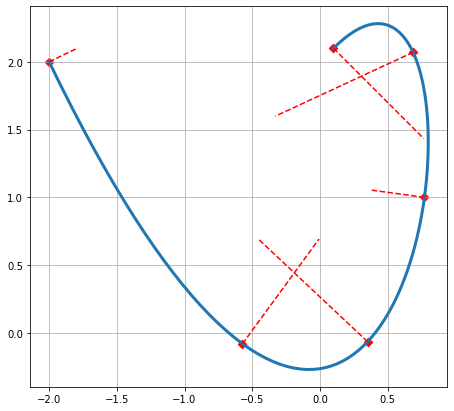

In [9]:
plt.figure(figsize=(10,7))
plt.grid()
plt.gca().set_aspect('equal', adjustable='box')
# _ = plt.scatter(x_weights, y_weights, c='green', marker='D')
_ = plt.plot(xs, ys, lw=3, ls='-')

delta_t = 0.2
epsilon = 1e-5

for t in sparse_times:
    x_start = B1(t) * x_weights[0] + B2(t) * x_weights[1] + B3(t) * x_weights[2] + B4(t) * x_weights[3]
    y_start = B1(t) * y_weights[0] + B2(t) * y_weights[1] + B3(t) * y_weights[2] + B4(t) * y_weights[3]
    
    dx_by_dt_1 = get_tangent(x_weights, t)
    dy_by_dt_1 = get_tangent(y_weights, t)
    norm_1 = norm([dx_by_dt_1, dy_by_dt_1])
    dx_by_dt_1 /= norm_1
    dy_by_dt_1 /= norm_1
    
    dx_by_dt_2 = get_tangent(x_weights, t+epsilon)
    dy_by_dt_2 = get_tangent(y_weights, t+epsilon)
    norm_2 = norm([dx_by_dt_2, dy_by_dt_2])
    dx_by_dt_2 /= norm_2
    dy_by_dt_2 /= norm_2
    
    curvature_x = (dx_by_dt_2 - dx_by_dt_1) / epsilon
    curvature_y = (dy_by_dt_2 - dy_by_dt_1) / epsilon
    
    curvature_x *= delta_t
    curvature_y *= delta_t
    
    plt.scatter(x_start, y_start, c='red', marker='D')
    plt.plot([x_start, x_start+curvature_x], [y_start, y_start+curvature_y], c='red', ls='--')
    

The magnitude of curvature is an indicator of how "curvy" the path is. It is constant for a circle and zero for a straight line.

The gradients calculated this way are approximate gradients and prone to errors. If you are familiar with autodiff (aka differentiable programming), you can get the **exact** gradients without figuring out the analytical solution yourself: 

In [10]:
from jax import numpy as jnp
from jax import grad

In [11]:
def get_normalized_tangent(t, x_weights, y_weights, return_x):
    dx_by_dt = get_tangent(x_weights, t)
    dy_by_dt = get_tangent(y_weights, t)
    norm_ = norm([dx_by_dt, dy_by_dt])
    dx_by_dt /= norm_
    dy_by_dt /= norm_
    return dx_by_dt if return_x else dy_by_dt

In [12]:
d_normalized_tangent_by_dt = grad(get_normalized_tangent)

In [13]:
d_normalized_tangent_by_dt(0.2, x_weights, y_weights, True)

/Users/sisovina/anaconda3/lib/python3.6/site-packages/jax/lib/xla_bridge.py:130: UserWarning: No GPU/TPU found, falling back to CPU.
  warnings.warn('No GPU/TPU found, falling back to CPU.')


DeviceArray(-5.083882, dtype=float32)

In [14]:
d_normalized_tangent_by_dt(0.2, x_weights, y_weights, False)

DeviceArray(-2.3567667, dtype=float32)

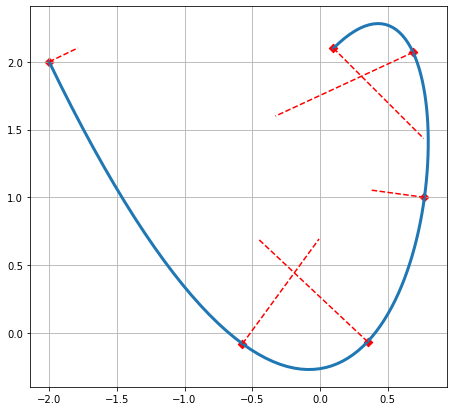

In [15]:
plt.figure(figsize=(10,7))
plt.grid()
plt.gca().set_aspect('equal', adjustable='box')
# _ = plt.scatter(x_weights, y_weights, c='green', marker='D')
_ = plt.plot(xs, ys, lw=3, ls='-')

delta_t = 0.2
epsilon = 1e-5

for t in sparse_times:
    x_start = B1(t) * x_weights[0] + B2(t) * x_weights[1] + B3(t) * x_weights[2] + B4(t) * x_weights[3]
    y_start = B1(t) * y_weights[0] + B2(t) * y_weights[1] + B3(t) * y_weights[2] + B4(t) * y_weights[3]
    
    curvature_x = d_normalized_tangent_by_dt(t, x_weights, y_weights, True).item()
    curvature_y = d_normalized_tangent_by_dt(t, x_weights, y_weights, False).item()
    
    curvature_x *= delta_t
    curvature_y *= delta_t
    
    plt.scatter(x_start, y_start, c='red', marker='D')
    plt.plot([x_start, x_start+curvature_x], [y_start, y_start+curvature_y], c='red', ls='--')
    